### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Import Data

In [37]:
df = pd.read_csv("C:\Data Science\Project\Wine dataset.csv")
print(df)

     class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1

### Basic informations

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### Data Cleaning

### Check duplicates

In [39]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool


### Box plot

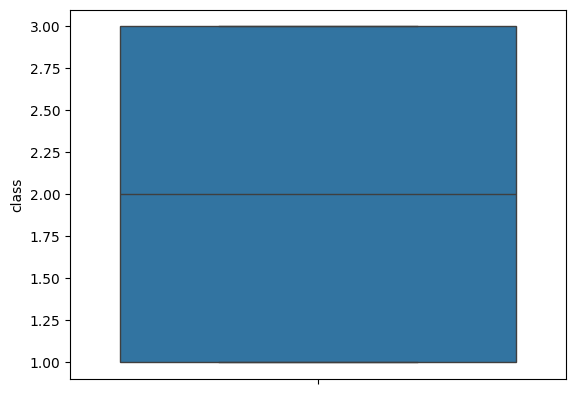

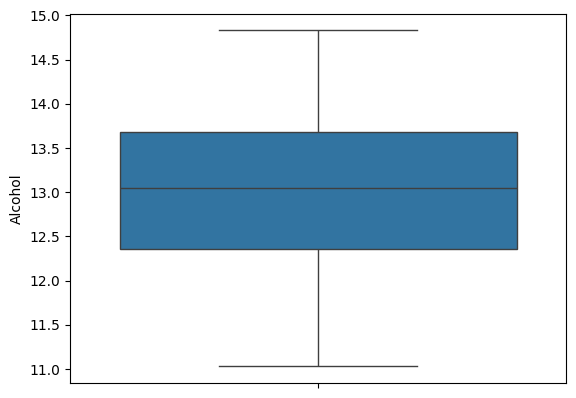

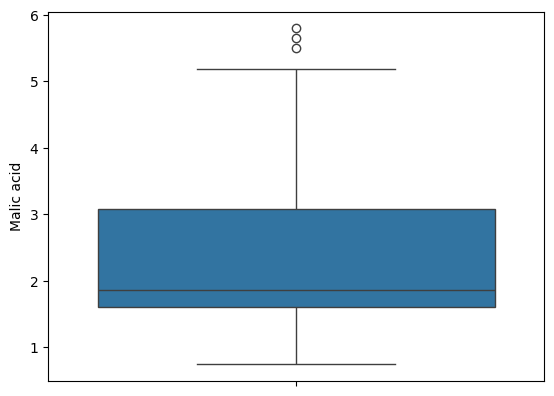

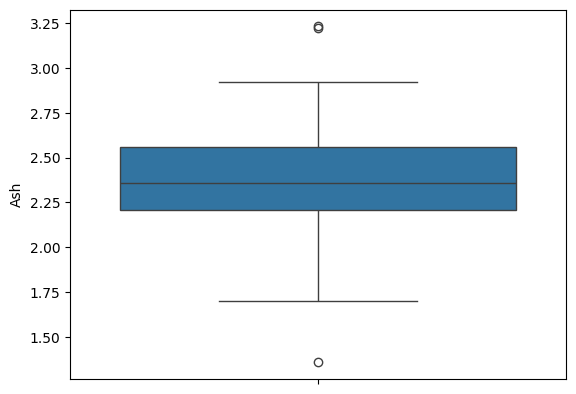

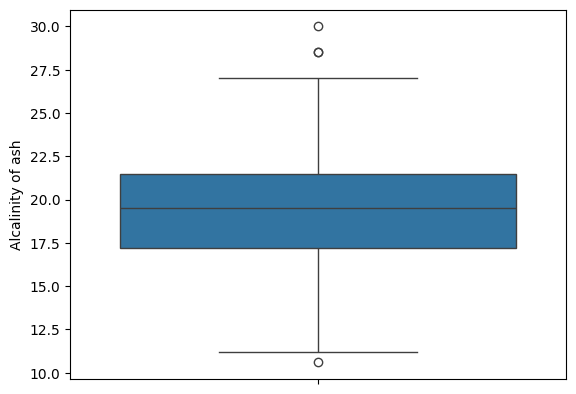

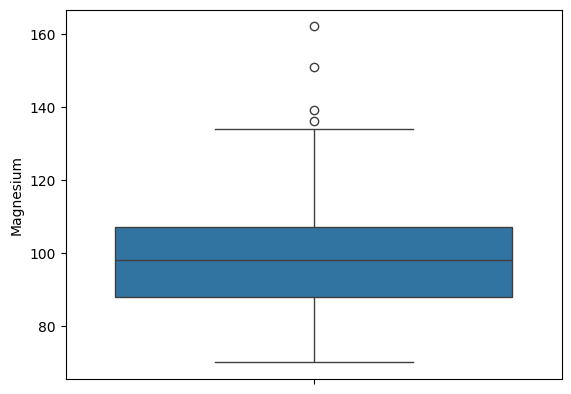

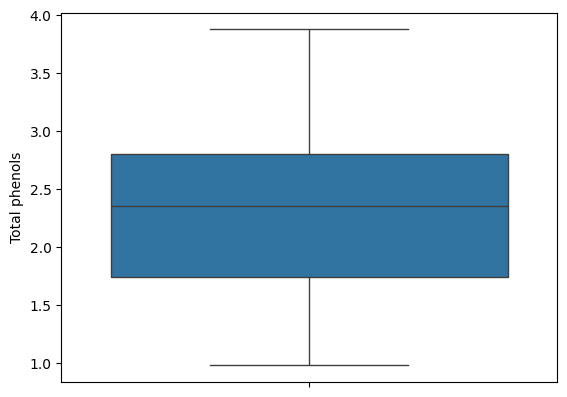

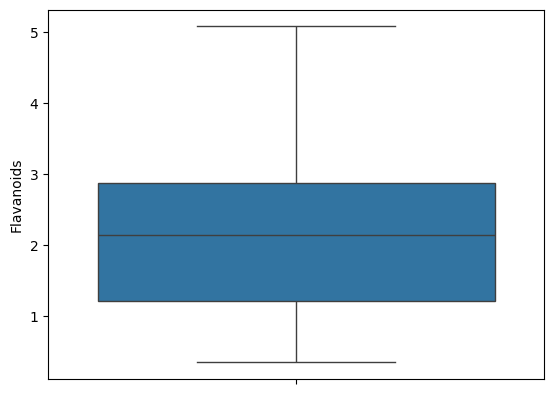

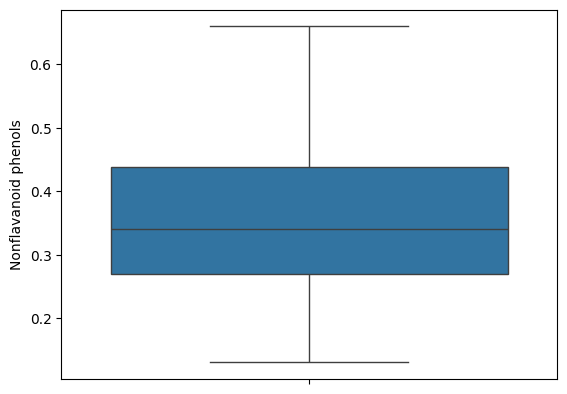

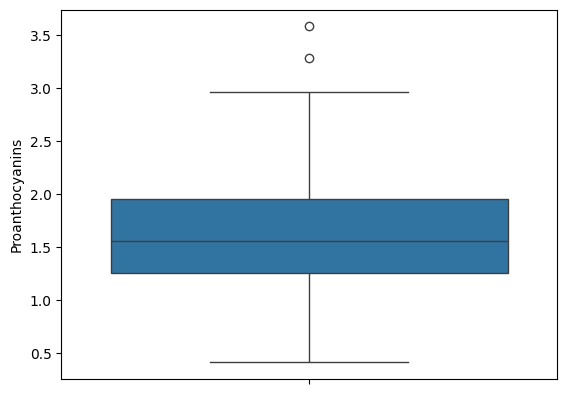

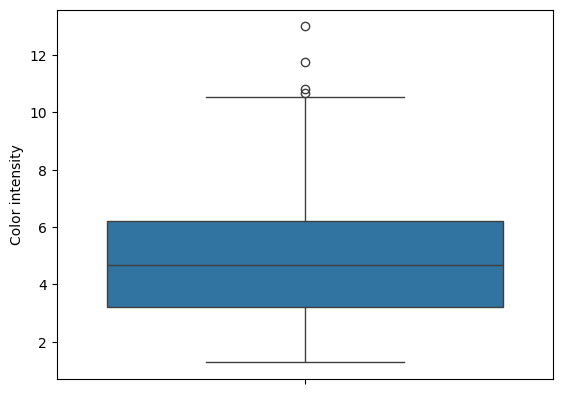

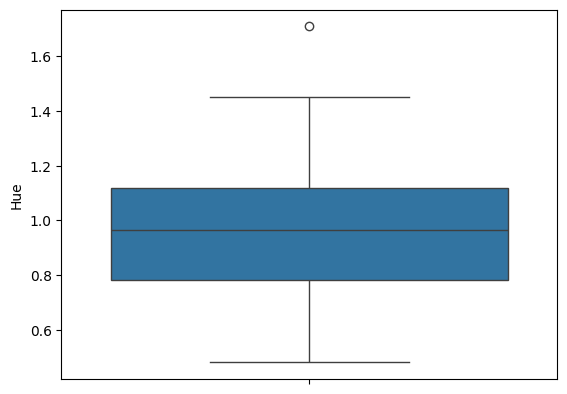

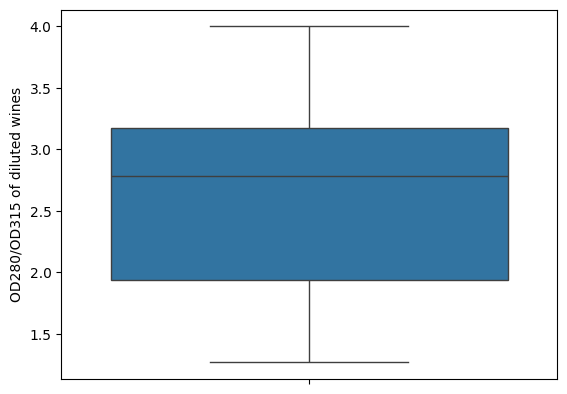

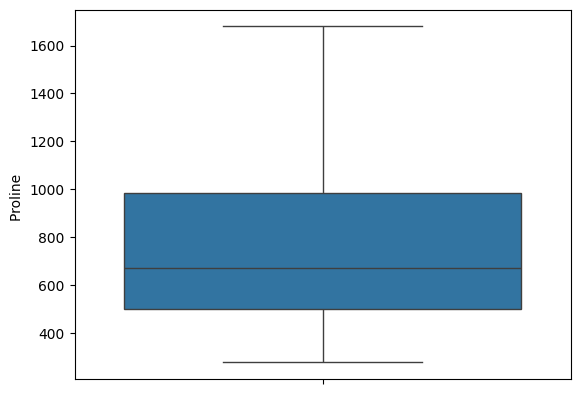

In [40]:
for i in df.columns:
    sns.boxplot(data=df,y=i)
    plt.show()

### Encoding

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
x = df.iloc[:,0:9].values
x = pd.DataFrame(x)       #independent var
y = df['class']          #dependent var
column_transformer = ColumnTransformer(
    transformers=[('encode',OneHotEncoder(),[7])],remainder='passthrough'
)
x = (column_transformer.fit_transform(x))


### Extract dependent and independent variable

                                 class   Alcohol  Malic acid       Ash  \
class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

<Axes: >

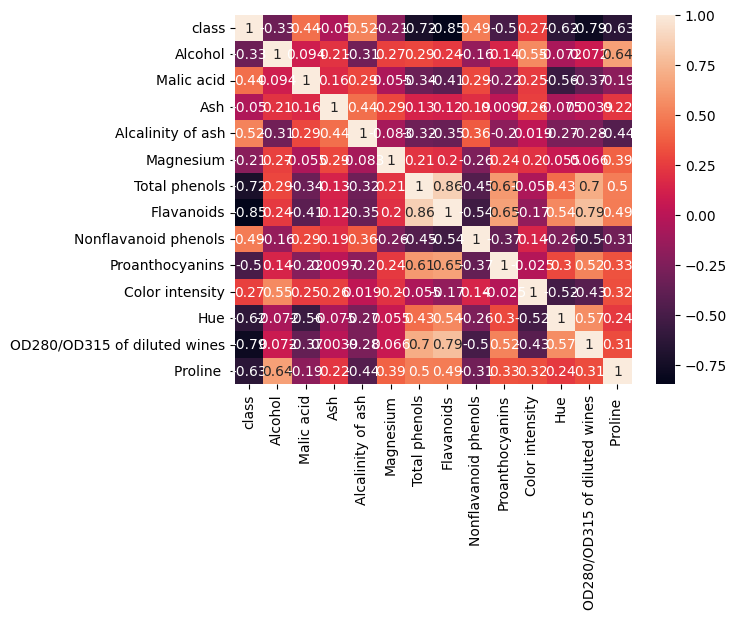

In [42]:
corre = df.corr(numeric_only=True)
print(corre)
sns.heatmap(corre,annot=True)

### split train and test data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Build Model

In [44]:
#plot graph

In [45]:
model = LinearRegression()
model.fit(x_train,y_train)

#pedicition the test set result
y_pred = model.predict(x_test)
data = pd.DataFrame({'Actual': y_test, 'predicted' : y_pred})
print(data)

     Actual  predicted
54        1   1.000026
151       3   2.999929
63        2   2.000051
55        1   1.000006
123       2   1.999960
121       2   1.999923
7         1   1.000046
160       3   3.000061
106       2   1.999970
90        2   2.000009
141       3   2.999992
146       3   2.999959
5         1   1.000031
98        2   2.000060
168       3   2.999928
80        2   2.000027
33        1   1.000050
18        1   1.000127
61        2   2.000020
51        1   1.000044
66        2   2.000100
37        1   0.999955
4         1   0.999937
104       2   1.999978
60        2   2.000189
111       2   2.000148
126       2   1.999904
86        2   1.999979
112       2   1.999966
164       3   3.000032
26        1   1.000120
56        1   1.000085
129       2   1.999984
45        1   1.000035
8         1   1.000116
44        1   1.000039


In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs = PolynomialFeatures(degree = 2)
x_poly = poly_regs.fit_transform(x)
model.fit(x_poly,y)

LinearRegression()

In [47]:
score = r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

r2 score is  99.99999901132034 %
